In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
figure = plt.gcf()


figure.set_size_inches(8, 6)

plt.savefig("sample.png", dpi=100)
plt.show()

<Figure size 800x600 with 0 Axes>

In [4]:
!locate Basemap

/mnt/HDD500/JPEG/NOTEBOOKS/005-Basemap-Using-arcGIS-server-checkpoint.ipynb
/mnt/HDD500/JPEG/NOTEBOOKS/005-Basemap-Using-arcGIS-server.ipynb
/mnt/HDD500/JPEG/NOTEBOOKS/008-Plotting-on-Basemaps-checkpoint.ipynb
/mnt/HDD500/JPEG/NOTEBOOKS/008-Plotting-on-Basemaps.ipynb
/mnt/HDD500/JPEG/NOTEBOOKS/011-Basemap-Using-arcGIS-server-checkpoint.ipynb
/mnt/HDD500/JPEG/NOTEBOOKS/011-Basemap-Using-arcGIS-server.ipynb
/mnt/HDD500/NOTEBOOKS/005-Basemap-Using-arcGIS-server-checkpoint.ipynb
/mnt/HDD500/NOTEBOOKS/005-Basemap-Using-arcGIS-server.ipynb
/mnt/HDD500/NOTEBOOKS/008-Plotting-on-Basemaps-checkpoint.ipynb
/mnt/HDD500/NOTEBOOKS/008-Plotting-on-Basemaps.ipynb
/mnt/HDD500/NOTEBOOKS/011-Basemap-Using-arcGIS-server-checkpoint.ipynb
/mnt/HDD500/NOTEBOOKS/011-Basemap-Using-arcGIS-server.ipynb
/mnt/HDD500/briefcase/covidData/COVID-19-Jupyter-Notebooks/005-Basemap-Using-arcGIS-server.ipynb
/mnt/HDD500/briefcase/covidData/COVID-19-Jupyter-Notebooks/008-Plotting-on-Basemaps.ipynb
/mnt/HDD500/briefcase/cov

In [7]:
import mpl_toolkits
dir(mpl_toolkits.mplot3d)

['Axes3D',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'art3d',
 'axes3d',
 'axis3d',
 'proj3d']

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
#prevents a warning from using Python3 instaead of Python2
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, "/home/jack/hidden")
import Key
import twython
from twython import Twython

#pick a random 'contiguous' state 
def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,49)
    return TX[x]
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)


fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')
from US_State_Bounding_Boxes import GetCOOR # get coordinates for state(box)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='salmon')
coor= GetCOOR(search)
urcrnrlat = coor[0]+.5
llcrnrlat = coor[1]-.5
urcrnrlon = coor[2]+.5
llcrnrlon = coor[3]-.5

lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2
print(lat_0/lon_0)
# create the map object, m
m = Basemap(resolution='f', projection='cyl', \
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full

# Draw some map elements on the map
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(color='blue')

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
# Beautiful Map -- m.arcgisimage(service=maps[2], xpixels=1000, verbose=False)
# Very N              -- m.arcgisimage(service=maps[7], xpixels=2000, verbose=True)
# okay not Great   m.arcgisimage(service=maps[10], xpixels=3500, verbose=True)
# okay not Great   m.arcgisimage(service=maps[8], xpixels=3500, verbose=True)
# 3 failed
#m.arcgisimage(service=maps[8], xpixels=1000, verbose=False)
MAP=7
m.arcgisimage(service=maps[MAP], xpixels=3500, verbose=True)
print ("...finished")

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.5)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd))
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=10, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude')
plt.ylabel('Latitute')

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)



#plt.scatter(x, y,  s=s, color="black", zorder=3, alpha=0.6)
#plt.scatter(x, y,  s=sd, color="red", zorder=6, alpha=0.6)
#plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
plt.savefig("BaseMap/"+search+"arcGIS__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)
#plt.show()
# Plot a scatter point at WBB on the map object
#lon = -111.85
#lat = 40.77
#m.scatter(lon,lat,c='r',s=150)

# Plot some wind barbs
#lons = np.arange(-115,-100,.5)
#lats = np.arange(33,48,.5)
#u = np.arange(-5,10,.5)
#v = np.arange(5,20,.5)
#m.barbs(lons, lats, u, v, color='fuchsia')

# Plot line between two points
# (can also use greatcircle function to be more accurate)
#x = [-110, -112]
#y = [40, 42]
#m.plot(x, y, color='navy', lw=5)

# Fill two polygon shapes
#patches = []
#homeplate = np.array([[-114,38],[-113,37],[-112,38],[-112,40],[-114,40]])
#patches.append(Polygon(homeplate))
#triangle = np.array([[-111,38],[-110,37],[-110,42]])
#patches.append(Polygon(triangle))
#ax.add_collection(PatchCollection(patches, facecolor='lightgreen', edgecolor='k', linewidths=1.5))

# Plot shapefiles: see here: http://basemaptutorial.readthedocs.io/en/latest/shapefile.html

# Plot contours
#m.contour(lons2D, lats2D, values2D)  # contour lines
# m.contourf(lons2D, lats2D, values2D) # contour color filled, can specify a cmap

# Plot gridded data
# m.pcolormesh(lons2D, lats2D, values2D) # can specify a cmap

# Add plot title and other plot elements the normal way
filename0 = "BaseMap/"+search+"arcGIS__.png"


def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    
    basewidth = 720
    inp = Image.open(filename0)
    wpercent = (basewidth / float(inp.size[0]))
    hsize = int((float(inp.size[1]) * float(wpercent)))
    inp = inp.resize((basewidth, hsize), Image.ANTIALIAS)
    #img.save(resized_image.jpg')
    
    #inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black

    i2 = draw_blurred_back(inp, (25, 25), "Plotting COVID-19 Data", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    font1 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 14)
    font2 = ImageFont.truetype("/home/jack/fonts/PatrickHand-Regular.ttf", 16)
    i2 = draw_blurred_back(i2, (25, 60), "Plot Using ArcGIS Basemap - "+search+"Map Type:"+str(MAP), font0, text_title, blur_title)
    TXT="https://gist.github.com/JupyterJones/c2fa42e8f78b943b64f7d7a4e4721c58"
    draw = ImageDraw.Draw(i2) 
    draw.text((25, 5), TXT, font = font2, align ="left",fill="black")
    #i2 = draw(i2, (15, 65),TXT, font1)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/"+search+"-"+str(MAP)+"-TEMP_POSTf.png")

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)

STR = "#"+search+"  #arcGIS server #Basemap #COVID-19 - #Python  Plot data using "+TXT+" #JupyterJones Python2 seems to make very attractive maps" 

PATH = "images/"+search+"-"+str(MAP)+"-TEMP_POSTf.png"
photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [3]:
!locate mpl_toolkits

/home/jack/Desktop/ffmpeg_flask/ffmpeg_server/lib/python3.8/site-packages/mpl_toolkits
/home/jack/Desktop/ffmpeg_flask/ffmpeg_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1
/home/jack/Desktop/ffmpeg_flask/ffmpeg_server/lib/python3.8/site-packages/mpl_toolkits/axisartist
/home/jack/Desktop/ffmpeg_flask/ffmpeg_server/lib/python3.8/site-packages/mpl_toolkits/mplot3d
/home/jack/Desktop/ffmpeg_flask/ffmpeg_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/__init__.py
/home/jack/Desktop/ffmpeg_flask/ffmpeg_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/__pycache__
/home/jack/Desktop/ffmpeg_flask/ffmpeg_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/anchored_artists.py
/home/jack/Desktop/ffmpeg_flask/ffmpeg_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_divider.py
/home/jack/Desktop/ffmpeg_flask/ffmpeg_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_grid.py
/home/jack/Desktop/ffmpeg_flask/ffmpeg_server/lib/python3.8

/home/jack/miniconda3/envs/bakup-clonebase/lib/python3.9/site-packages/mpl_toolkits
/home/jack/miniconda3/envs/bakup-clonebase/lib/python3.9/site-packages/mpl_toolkits/axes_grid
/home/jack/miniconda3/envs/bakup-clonebase/lib/python3.9/site-packages/mpl_toolkits/axes_grid1
/home/jack/miniconda3/envs/bakup-clonebase/lib/python3.9/site-packages/mpl_toolkits/axisartist
/home/jack/miniconda3/envs/bakup-clonebase/lib/python3.9/site-packages/mpl_toolkits/mplot3d
/home/jack/miniconda3/envs/bakup-clonebase/lib/python3.9/site-packages/mpl_toolkits/tests
/home/jack/miniconda3/envs/bakup-clonebase/lib/python3.9/site-packages/mpl_toolkits/axes_grid/__init__.py
/home/jack/miniconda3/envs/bakup-clonebase/lib/python3.9/site-packages/mpl_toolkits/axes_grid/__pycache__
/home/jack/miniconda3/envs/bakup-clonebase/lib/python3.9/site-packages/mpl_toolkits/axes_grid/anchored_artists.py
/home/jack/miniconda3/envs/bakup-clonebase/lib/python3.9/site-packages/mpl_toolkits/axes_grid/angle_helper.py
/home/jack/min

/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/mpl_toolkits
/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/mpl_toolkits/axes_grid
/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/mpl_toolkits/axes_grid1
/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/mpl_toolkits/axisartist
/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/mpl_toolkits/mplot3d
/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/mpl_toolkits/tests
/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/mpl_toolkits/axes_grid/__init__.py
/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/mpl_toolkits/axes_grid/__pycache__
/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/mpl_toolkits/axes_grid/anchored_artists.py
/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/mpl_toolkits/axes_grid/angle_helper.py
/home/jack/miniconda3/envs/cloned_base/lib/python3.9/s

/home/jack/miniconda3/envs/cloned_py31/lib/python3.10/site-packages/mpl_toolkits
/home/jack/miniconda3/envs/cloned_py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid
/home/jack/miniconda3/envs/cloned_py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid1
/home/jack/miniconda3/envs/cloned_py31/lib/python3.10/site-packages/mpl_toolkits/axisartist
/home/jack/miniconda3/envs/cloned_py31/lib/python3.10/site-packages/mpl_toolkits/mplot3d
/home/jack/miniconda3/envs/cloned_py31/lib/python3.10/site-packages/mpl_toolkits/tests
/home/jack/miniconda3/envs/cloned_py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid/__init__.py
/home/jack/miniconda3/envs/cloned_py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid/__pycache__
/home/jack/miniconda3/envs/cloned_py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid/anchored_artists.py
/home/jack/miniconda3/envs/cloned_py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid/angle_helper.py
/home/jack/miniconda3/envs/cloned_py31/lib/p

/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits
/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid
/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid1
/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits/axisartist
/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits/mplot3d
/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits/tests
/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid/__init__.py
/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid/__pycache__
/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid/anchored_artists.py
/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid/angle_helper.py
/home/jack/miniconda3/envs/py31/lib/python3.10/site-packages/mpl_toolkits/axes_grid/axes_divider.py
/home/jack/min

/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits
/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/axes_grid
/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/axes_grid1
/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/axisartist
/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/mplot3d
/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/tests
/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py
/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__pycache__
/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/axes_grid/anchored_artists.py
/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/axes_grid/angle_helper.py
/home/jack/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/axes_grid/axes_divider.py
/home/jack/miniconda3/env

/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/axes_grid
/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/axes_grid1
/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/axisartist
/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/mplot3d
/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/tests
/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/axes_grid/__init__.py
/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/axes_grid/__pycache__
/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/axes_grid/anchored_artists.py
/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/axes_grid/angle_helper.py
/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/axes_grid/axes_divider.py
/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/axes_grid/axes_grid.py
/h

/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/axes_grid1
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/axisartist
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/mplot3d
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/tests
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/__init__.py
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/__pycache__
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/anchored_artists.py
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_divider.py
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_grid.py
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_rgb.py
/home/jack/miniconda3/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_size.py
/home/jack/miniconda3/lib/python3

/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/axes_grid1
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/axisartist
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/mplot3d
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/__init__.py
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/__pycache__
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/anchored_artists.py
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_divider.py
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_grid.py
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_rgb.py
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_size.py
/mnt/HDD500/AWS/aws/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/inset_locator.py
/mnt/HDD500/AWS/aws/lib/python3.8/s

/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits
/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1
/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axisartist
/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits/mplot3d
/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/__init__.py
/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/__pycache__
/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/anchored_artists.py
/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_divider.py
/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_grid.py
/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_rgb.py
/mnt/HDD500/FLASK/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_size.py
/mnt/HDD500/FLASK/flask_v

/mnt/HDD500/collections/00de3/flask_server/lib/python3.8/site-packages/mpl_toolkits
/mnt/HDD500/collections/00de3/flask_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1
/mnt/HDD500/collections/00de3/flask_server/lib/python3.8/site-packages/mpl_toolkits/axisartist
/mnt/HDD500/collections/00de3/flask_server/lib/python3.8/site-packages/mpl_toolkits/mplot3d
/mnt/HDD500/collections/00de3/flask_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/__init__.py
/mnt/HDD500/collections/00de3/flask_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/__pycache__
/mnt/HDD500/collections/00de3/flask_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/anchored_artists.py
/mnt/HDD500/collections/00de3/flask_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_divider.py
/mnt/HDD500/collections/00de3/flask_server/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_grid.py
/mnt/HDD500/collections/00de3/flask_server/lib/python3.8/site-packages/mpl_toolkits/ax

/mnt/HDD500/collections/flask/flask_venv/lib/python3.9/site-packages/mpl_toolkits
/mnt/HDD500/collections/flask/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1
/mnt/HDD500/collections/flask/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axisartist
/mnt/HDD500/collections/flask/flask_venv/lib/python3.9/site-packages/mpl_toolkits/mplot3d
/mnt/HDD500/collections/flask/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/__init__.py
/mnt/HDD500/collections/flask/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/anchored_artists.py
/mnt/HDD500/collections/flask/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_divider.py
/mnt/HDD500/collections/flask/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_grid.py
/mnt/HDD500/collections/flask/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_rgb.py
/mnt/HDD500/collections/flask/flask_venv/lib/python3.9/site-packages/mpl_toolkits/axes_grid1/axes_size.p

(720, 595)


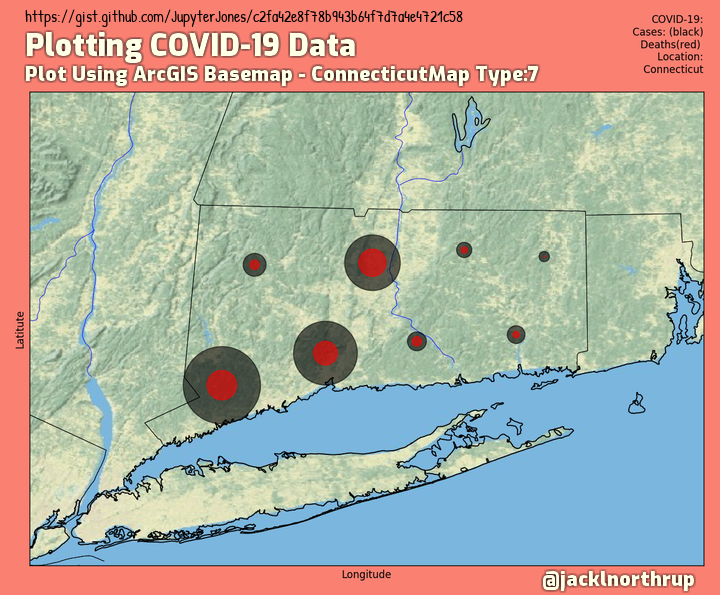

In [27]:
from PIL import Image
IM =Image.open(PATH)
print IM.size
IM

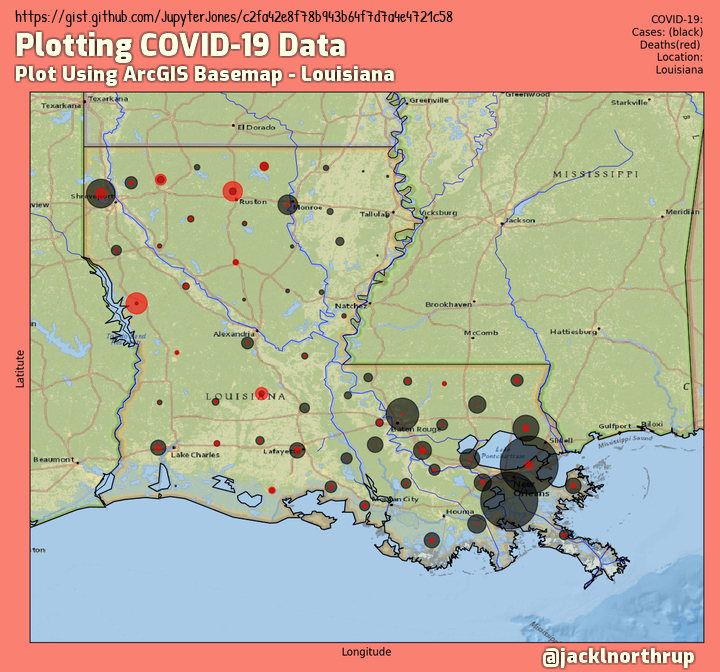

In [5]:
from PIL import Image
IM =Image.open(PATH)
IM

In [2]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Fixing random state for reproducibility
np.random.seed(19680801)


metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

plt.xlim(-15, 15)
plt.ylim(-15, 15)

x0, y0 = 0, 0

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(500):
        x0 += 0.02 * np.random.randn()
        y0 += 0.02 * np.random.randn()
        l.set_data(x0, y0)
        writer.grab_frame()

In [3]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="writer_test.mp4" type="video/mp4">
    </video>
""")

In [24]:
import Basemap

ModuleNotFoundError: No module named 'Basemap'

In [26]:
!locate Basemap

/mnt/40ec525c-34bc-44ef-99c8-53f5524ad88b/home/jack/Desktop/JupyterNotebook-Geos/Basemap.ipynb
/mnt/40ec525c-34bc-44ef-99c8-53f5524ad88b/home/jack/Desktop/JupyterNotebook-Geos/.ipynb_checkpoints/Basemap-checkpoint.ipynb
/mnt/40ec525c-34bc-44ef-99c8-53f5524ad88b/home/jack/Desktop/JupyterNotebook-Geos/notebooks/examples/Basemap-GET_STORM_EVENTS_DATA.ipynb
/mnt/40ec525c-34bc-44ef-99c8-53f5524ad88b/home/jack/Desktop/JupyterNotebook-Geos/notebooks/examples/.ipynb_checkpoints/Basemap-GET_STORM_EVENTS_DATA-checkpoint.ipynb
/mnt/40ec525c-34bc-44ef-99c8-53f5524ad88b/home/jack/Desktop/jupyter-k3d/Basemap.ipynb
/mnt/40ec525c-34bc-44ef-99c8-53f5524ad88b/home/jack/Desktop/jupyter-k3d/.ipynb_checkpoints/Basemap-checkpoint.ipynb
